In [1]:
library(CellAnnotatoR)
library(Seurat)
library(dplyr)
library(ggplot2)

theme_set(theme_bw())
RhpcBLASctl::blas_set_num_threads(20)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [23]:
merged = qs::qread('obj_cellbender.qs')
merged

An object of class Seurat 
27757 features across 126957 samples within 1 assay 
Active assay: RNA (27757 features, 0 variable features)
 1 layer present: counts

In [25]:
source("/projects/dylan/leptin_paper/R/process_seurat.R") # this loads Dylans function
merged <- process_seurat(merged, method = "integrate", batch ="batch", dims = 30, res = 0.5) 
#this may take a while to run you can also dowhatever normailazation

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Normalizing layer: counts

Finding variable features for layer counts

Scaling features for provided objects

Computing within dataset neighborhoods

Finding all pairwise anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 45180 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 48872 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 69244 anchors

Merging dataset 2 into 3

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Merging dataset 1 into 3 2

Extracting anchors for merged samples

Finding integration vectors

Warning message:
“Different cells in new layer data than already exi

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 126957
Number of edges: 5553986

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9683
Number of communities: 47
Elapsed time: 62 seconds


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



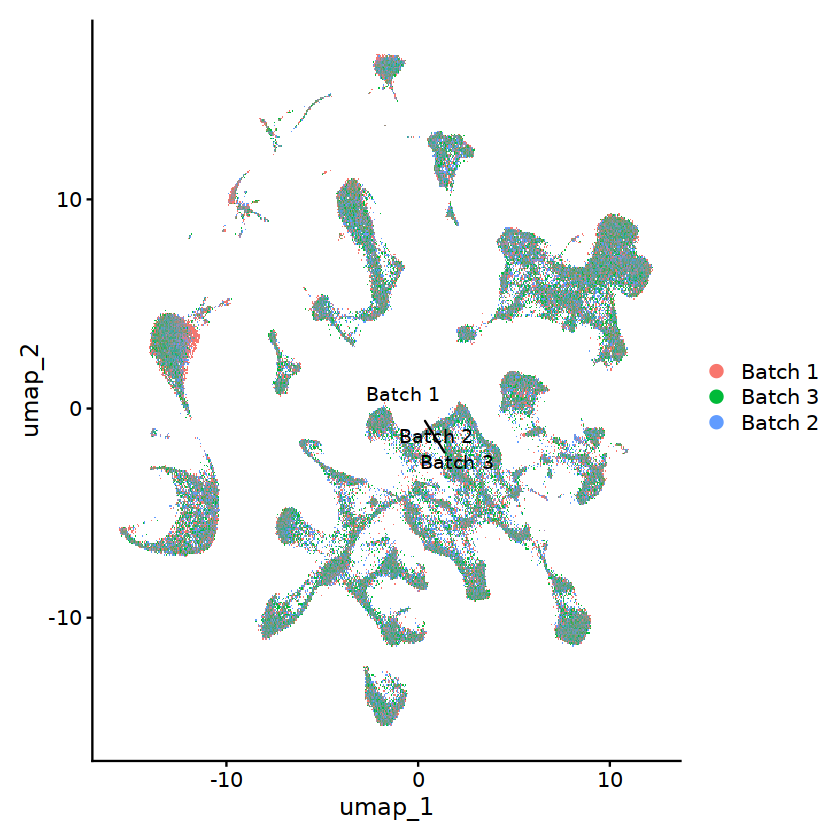

In [28]:
Idents(merged) <- merged %>% `[[` %>% pull(batch)
DimPlot(merged, reduction = "umap", label=T, repel = T)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



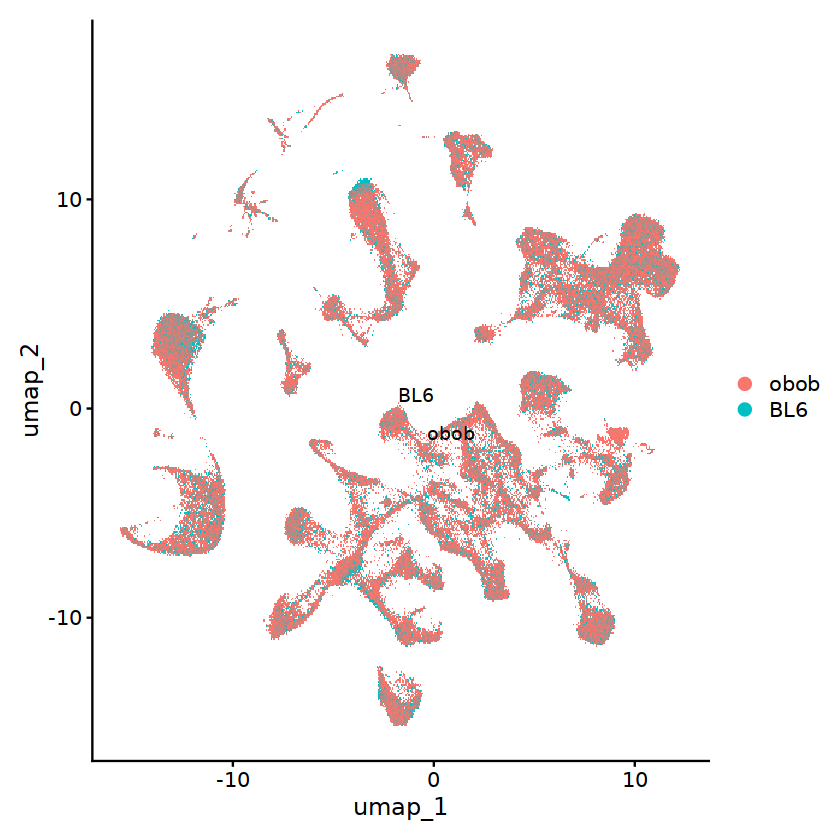

In [29]:
Idents(merged) <- merged %>% `[[` %>% pull(strain)
DimPlot(merged, reduction = "umap", label=T, repel = T)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



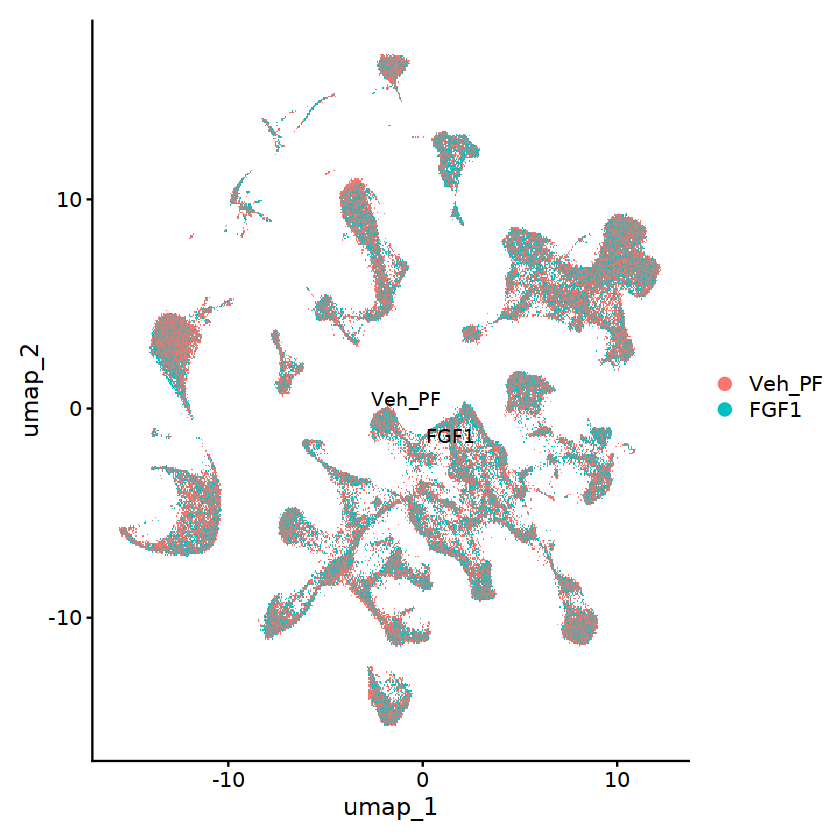

In [30]:
Idents(merged) <- merged %>% `[[` %>% pull(treatment)
DimPlot(merged, reduction = "umap", label=T, repel = T)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



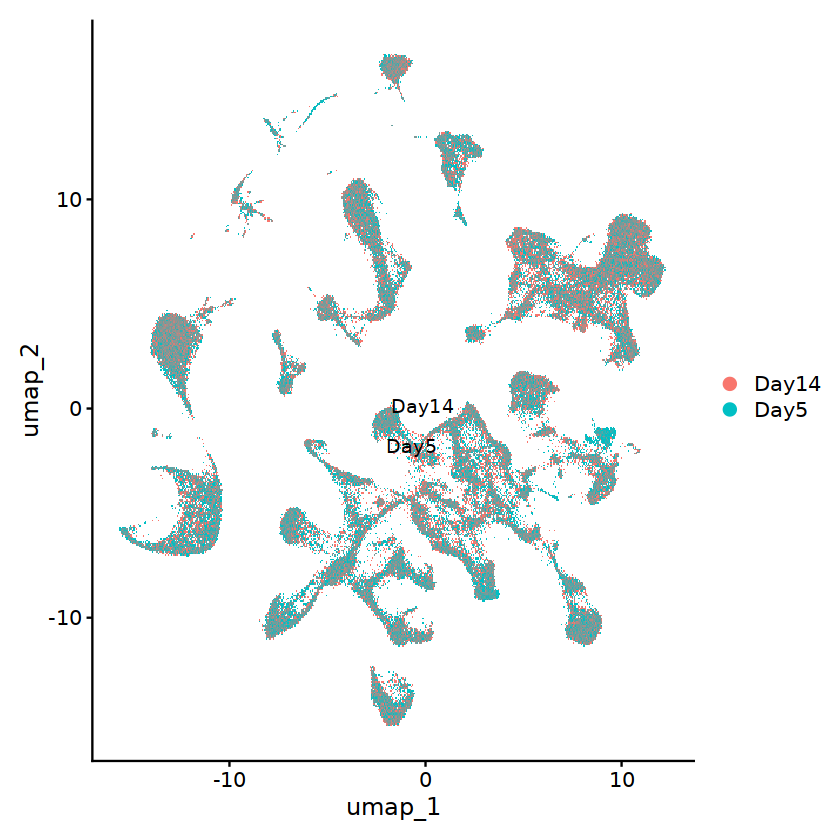

In [31]:
Idents(merged) <- merged %>% `[[` %>% pull(time)
DimPlot(merged, reduction = "umap", label=T, repel = T)

In [33]:
merged

An object of class Seurat 
29757 features across 126957 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [35]:
merged@assays$integrated@data

  [[ suppressing 32 column names ‘SI-TT-A11_AAACCCAAGGTGGTTG’, ‘SI-TT-A11_AAACCCACATACAGCT’, ‘SI-TT-A11_AAACCCACATGAGGGT’ ... ]]



2000 x 126957 sparse Matrix of class "dgCMatrix"
                                                                     
Bcas1os2       .             2.150765e-03 -1.435678e-04  .           
Bcas1         -9.002482e-03  1.118141e-02 -5.808158e-04  6.827303e-05
Hdc           -4.250917e-03  3.517168e-04  2.619502e-03  .           
Slco1a4        .            -1.428622e-03  .             2.726653e-03
Plp1          -6.886806e-02  9.005887e-01 -8.690030e-02 -2.166890e-02
Adarb2        -1.218498e-01  1.806720e-01  9.806452e-02  1.193677e-02
Gm32647        4.518072e-01  7.242082e-02  1.804784e-01  7.881011e-03
Mbp           -9.719936e-02 -5.914255e-02  6.511222e-01 -3.034670e-02
Unc13c        -6.645170e-02  2.772576e+00  6.368856e-01  5.049339e-02
Mobp           .            -9.141520e-04  8.029356e-06 -3.925389e-04
Col24a1       -5.692555e-03 -6.562016e-03  1.681696e-02  4.768441e-03
Npsr1          1.080902e-02  1.884511e-02  3.499707e-02  4.437336e-03
Slc4a4         4.512816e-03  7.838125e-01

In [3]:
annotator_preprocess = function(obj){
   obj %>% 
   NormalizeData %>%
   FindVariableFeatures(selection.method = "vst", nfeatures=3000) %>% 
   ScaleData %>% 
   RunPCA(features=VariableFeatures(.), npcs=50) %>% 
   FindNeighbors(dims=1:50) %>% 
   FindClusters %>%
   Seurat::RunUMAP(reduction = "pca", dims = 1:50, return.model = TRUE)
}

In [4]:
source('../00_preprocessing/preprocessing.R')

In [ ]:
merged = merged %>%
    Seurat::SCTransform(assay='RNA',
                        method="glmGamPoi",
                        vars.to.regress="batch",
                        vst.flavor="v2",
                        variable.features.n = 3000,
                        verbose=TRUE) %>% 
    run_sct_chaser

merged

Running SCTransform on assay: RNA

Running SCTransform on layer: counts

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Variance stabilizing transformation of count matrix of size 27752 by 126957

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells

Found 507 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 27752 genes

Computing corrected count matrix for 27752 genes



In [6]:
merged %>% qs::qsave('merged_sct.qs')

In [7]:
merged

An object of class Seurat 
55509 features across 126957 samples within 2 assays 
Active assay: SCT (27752 features, 10000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



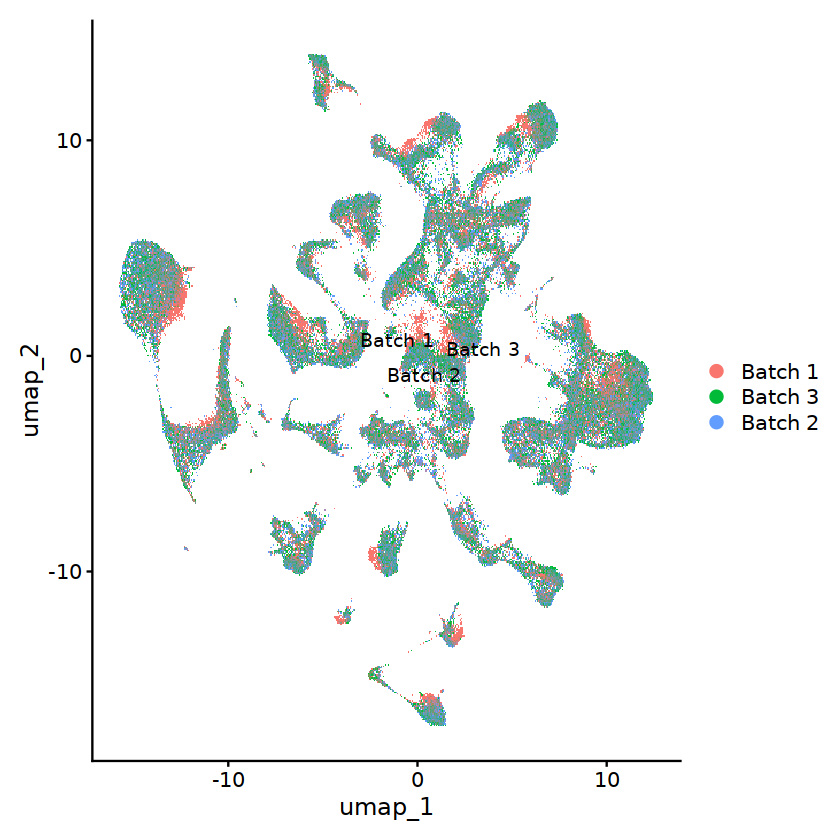

In [19]:
Idents(merged) <- merged %>% `[[` %>% pull(batch)
DimPlot(merged, reduction = "umap", label=T, repel = T)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



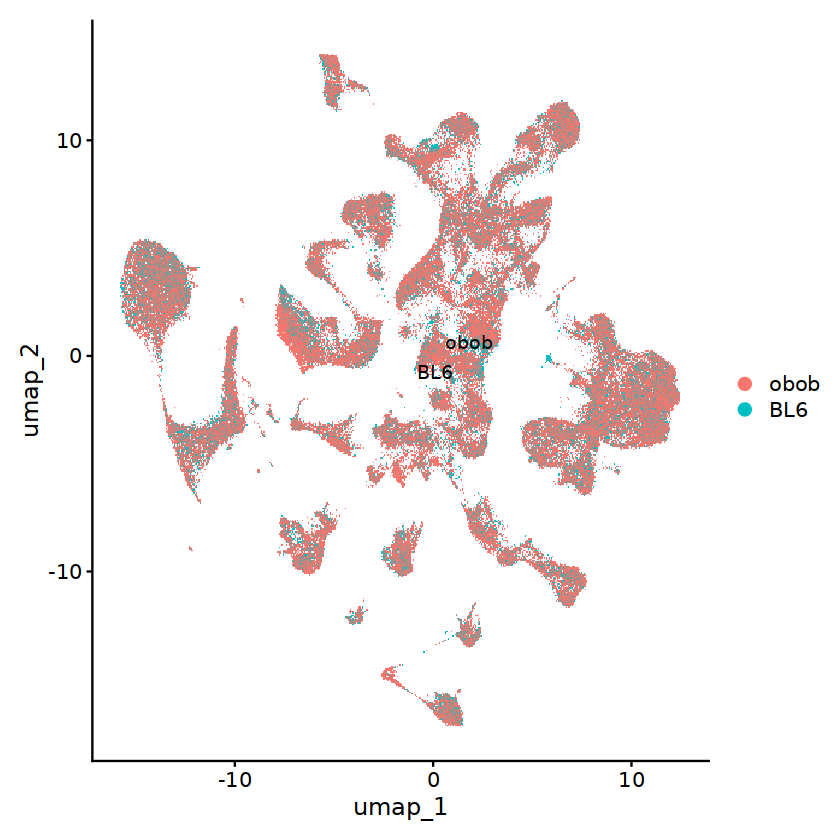

In [20]:
Idents(merged) <- merged %>% `[[` %>% pull(strain)
DimPlot(merged, reduction = "umap", label=T, repel = T)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



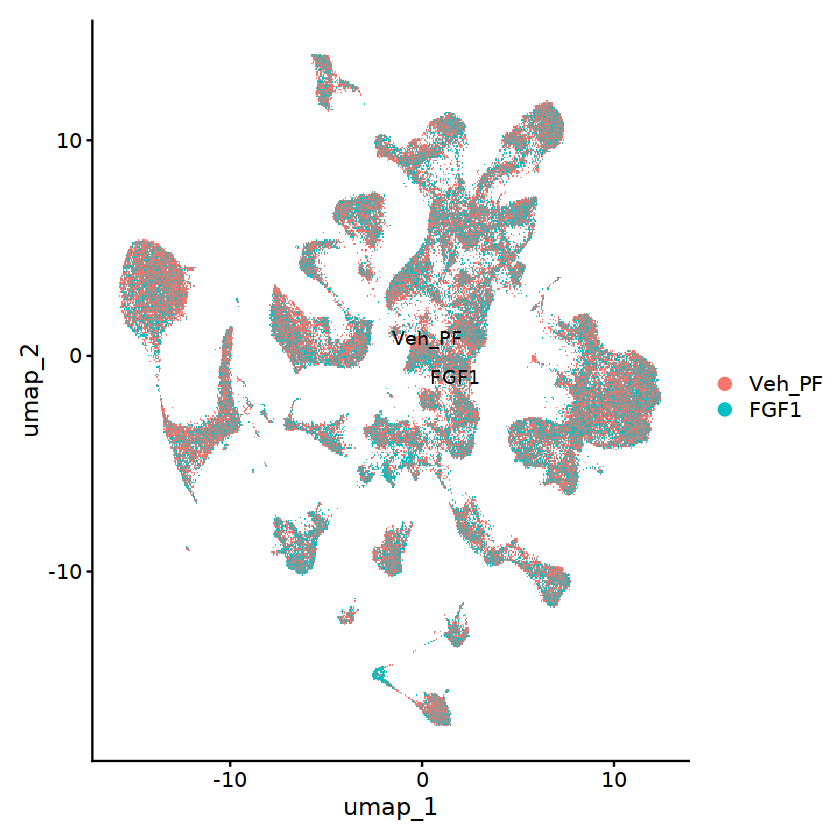

In [21]:
Idents(merged) <- merged %>% `[[` %>% pull(treatment)
DimPlot(merged, reduction = "umap", label=T, repel = T)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



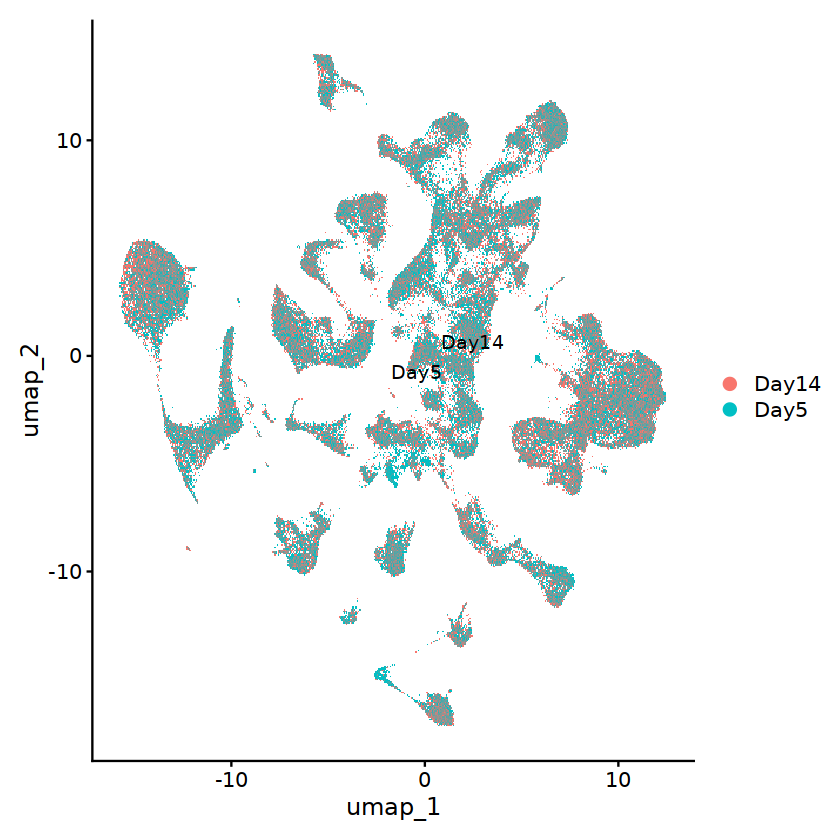

In [22]:
Idents(merged) <- merged %>% `[[` %>% pull(time)
DimPlot(merged, reduction = "umap", label=T, repel = T)

In [14]:
exp_04 = qs::qread('../00_preprocessing/_targets/objects/exp_04')
exp_04

An object of class Seurat 
58800 features across 144287 samples within 3 assays 
Active assay: integrated (3434 features, 3434 variable features)
 2 layers present: data, scale.data
 2 other assays present: RNA, SCT
 2 dimensional reductions calculated: pca, umap

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



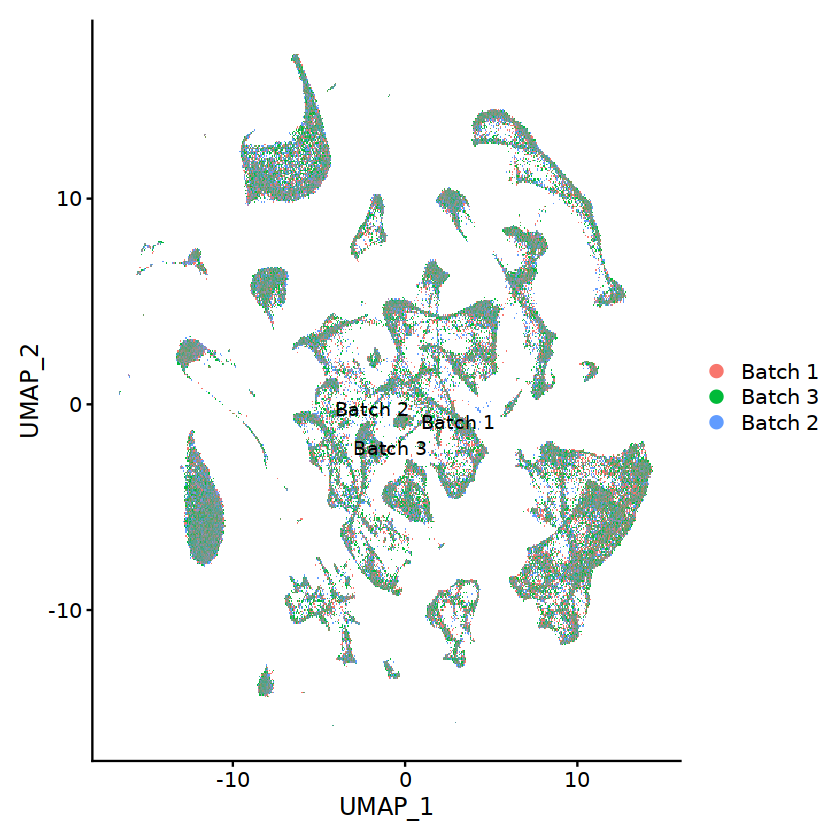

In [15]:
Idents(exp_04) <- merged %>% `[[` %>% pull(batch)
DimPlot(exp_04, reduction = "umap", label=T, repel = T)

In [12]:
merged = merged %>%
annotator_preprocess

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix

PC_ 1 
Positive:  Gm26871, Cntnap2, Syt1, Csmd1, Lingo2, Tenm2, Nrg3os, Gm20642, Dab1, Rbfox1 
	   Kcnb2, Grm5, Galnt13, Ryr2, Grm7, Opcml, Lrfn5, Ralyl, March1, Lrrtm4 
	   Cdh18, Slc8a1, Unc5c, Gabra2, Spock3, Prkg1, Kcnip4, Unc5d, Cntnap5a, Nkain2 
Negative:  Slc1a3, Slc1a2, Slc4a4, Nfia, Apoe, Atp1a2, Plpp3, Slc39a12, Sparcl1, Prex2 
	   Gm3764, Lhfp, Qk, Npas3, Sox6, Pitpnc1, Gm9925, Ndrg2, Mapk4, Plce1 
	   Slc6a11, Wdr17, Lrig1, Mertk, Nhsl1, Atp13a4, Itih3, Bcan, Ntsr2, Gm6145 
PC_ 2 
Positive:  Ntm, Kcnd2, Gpc5, Gm20713, Atp13a4, Itih3, Dock4, Cadm2, Cdh20, Gm6145 
	   Luzp2, Brinp3, Nhsl1, Ntsr2, Cdh10, Mpp6, Adcy8, Sparcl1, Egfr, Paqr8 
	   Gsdme, Gm3764, Lrp1b, Gm21798, Kank1, Cep85l, Slc7a10, Lama2, Gm12239, Gm26703 
Negative:  Col23a1, Ccdc170, C230072F16Rik, 6330403K07Rik, Tshr, Dnah11, Efna5, Pdzrn3, Cdc14a, Cfap43 
	   Adgrv1, Ak9, Ccdc114, Ttc21a, Enkur, Spag16, L

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 126957
Number of edges: 5154257

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9603
Number of communities: 57
Elapsed time: 58 seconds


UMAP will return its model

18:09:55 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

18:09:55 Read 126957 rows and found 50 numeric columns

18:09:55 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'spam'

Also defined by ‘BiocGenerics’

18:09:55 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:10:17 Writing NN index file to temp file /scratch/nmq407/R_tmp//Rtmpn44t0z/file403264fbc0e0

18:10:17 Searching Annoy index using 1 thread, search_k = 3000

18:11:35 Annoy recall = 100%

18:11:37 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



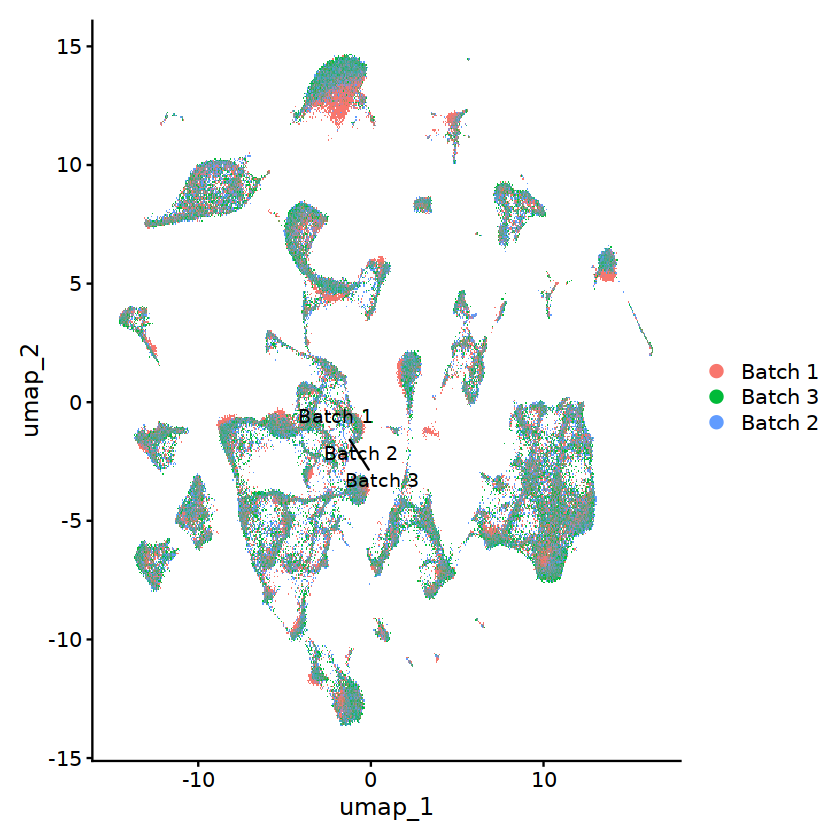

In [13]:
Idents(merged) <- merged %>% `[[` %>% pull(batch)
DimPlot(merged, reduction = "umap", label=T, repel = T)

In [ ]:
cm <- merged@assays$RNA$counts
cm_norm <- Matrix::t(merged@assays$RNA$data)
graph <- merged@graphs$RNA_snn
emb <- merged@reductions$umap@cell.embeddings
clusters <- setNames(merged@meta.data$seurat_clusters, rownames(merged@meta.data))
marker_path <- "/projects/nvg559/marker_major_class.txt"
clf_data <- getClassificationData(cm, marker_path)
ann_by_level <- assignCellsByScores(graph=NULL, clf_data, clusters=clusters)
Idents(merged) <- ann_by_level$annotation$l1
p1<-DimPlot(merged, reduction = "umap", label=T, repel = T)+NoLegend() 
merged[["major.class"]] <- merged@active.ident

In [ ]:
p1

In [ ]:
merged_non <- subset(merged, subset = major.class %in% "Not_Neurons")
merged_neuron <- subset(merged, subset = major.class %in% c("Neurons"))

In [ ]:
merged_non = merged_non %>%
    annotator_preprocess

In [ ]:
cm <- merged_non@assays$RNA$counts
cm_norm <- Matrix::t(merged_non@assays$RNA$data)
graph <- merged_non@graphs$RNA_snn
emb <- merged_non@reductions$umap@cell.embeddings
clusters <- setNames(merged_non@meta.data$seurat_clusters, rownames(merged_non@meta.data))
marker_path <- "/projects/nvg559/marker2.txt"
clf_data <- getClassificationData(cm, marker_path)
ann_by_level <- assignCellsByScores(graph=NULL, clf_data, clusters=clusters)
Idents(merged_non) <- ann_by_level$annotation$l1
p2 = DimPlot(merged_non, reduction = "umap", label=T, repel = T)+NoLegend() 
merged_non[["sub.class"]] <- merged_non@active.ident

In [ ]:
p2

In [ ]:
source("/projects/dylan/leptin_paper/R/process_seurat.R") # this loads Dylans function

In [ ]:
merged_non_tanycytes <- subset(merged_non, subset = sub.class %in% c("Tanycytes")) %>%
    annotator_preprocess

merged_non_tanycytes

In [ ]:
cm <- merged_non_tanycytes@assays$RNA$counts
cm_norm <- Matrix::t(merged_non_tanycytes@assays$RNA$data)
graph <- merged_non_tanycytes@graphs$RNA_snn
emb <- merged_non_tanycytes@reductions$umap@cell.embeddings
clusters <- setNames(merged_non_tanycytes@meta.data$seurat_clusters, rownames(merged_non_tanycytes@meta.data))
marker_path <- "/projects/nvg559/tany.txt"
clf_data <- getClassificationData(cm, marker_path)
ann_by_level <- assignCellsByScores(graph=NULL, clf_data, clusters=clusters)

In [ ]:
Idents(merged_non_tanycytes) <- ann_by_level$annotation$l1
DimPlot(merged_non_tanycytes, reduction = "umap", label=T, repel = T)
merged_non_tanycytes[["sub.class"]] <- merged_non_tanycytes@active.ident
p3 = DimPlot(merged_non_tanycytes, reduction = "umap", label=T, repel = T)+NoLegend() 
p3

In [ ]:
Idents(merged_non_tanycytes) <- merged_non_tanycytes %>% `[[` %>% pull(Index.10x_SCOP)
DimPlot(merged_non_tanycytes, reduction = "umap", label=T, repel = T)

In [ ]:
merged_non_tanycytes %>% 
`[[` %>% colnames

--
title: "CellAnnotatoR"
author: "Jenny Brown"
date: "12/12/2023"
output: html_document
---

```{r setup, include=FALSE}
knitr::opts_chunk$set(echo = TRUE)
```

This is the github page:
https://github.com/khodosevichlab/CellAnnotatoR

#### --- Load Libraries --- ####
```{r}
library(qs)
library(Seurat)
library(CellAnnotatoR)
library(conos)
```

1st I classify neurons and not_neurons
#### --- Run cell annitator --- ####
```{r}
merged <- Seurat.obj_name

cm <- merged@assays$RNA@counts
cm_norm <- Matrix::t(merged@assays$RNA@data)
graph <- merged@graphs$RNA_snn
emb <- merged@reductions$umap@cell.embeddings
clusters <- setNames(merged@meta.data$seurat_clusters, rownames(merged@meta.data))
marker_path <- "/projects/nvg559/marker_major_class.txt"
clf_data <- getClassificationData(cm, marker_path)
ann_by_level <- assignCellsByScores(graph=NULL, clf_data, clusters=clusters)
```

```{r}
Idents(merged) <- ann_by_level$annotation$l1
p1<-DimPlot(merged, reduction = "umap", label=T, repel = T)+NoLegend() 
merged[["major.class"]] <- merged@active.ident
```

2nd I split the objects by neurons and not neurons
```{r}
merged_non <- subset(merged, subset = major.class %in% "Not_Neurons")
merged_neuron <- subset(merged, subset = major.class %in% c("Neurons"))
```

3rd I classify the not_neurons
#### --- Run cell annitator --- ####
```{r}
cm <- merged_non@assays$RNA@counts
cm_norm <- Matrix::t(merged_non@assays$RNA@data)
graph <- merged_non@graphs$RNA_snn
emb <- merged_non@reductions$umap@cell.embeddings
clusters <- setNames(merged_non@meta.data$seurat_clusters, rownames(merged_non@meta.data))
marker_path <- "/projects/nvg559/marker2.txt"
clf_data <- getClassificationData(cm, marker_path)
ann_by_level <- assignCellsByScores(graph=NULL, clf_data, clusters=clusters)
```

```{r}
Idents(merged_non) <- ann_by_level$annotation$l1
DimPlot(merged_non, reduction = "umap", label=T, repel = T)+NoLegend() 
merged_non[["sub.class"]] <- merged_non@active.ident
```

4th I subset and classify the tanyctes
```{r}
merged_non_tanycytes <- subset(merged_non, subset = sub.class %in% c("Tanycytes"))

source("/projects/dylan/leptin_paper/R/process_seurat.R") # this loads Dylans function
merged_non_tanycytes<- process_seurat(merged_non_tanycytes, method = "integrate", batch ="run",  dims = 30, res = .5) #this may take a while to run you can also dowhatever normailazation
```


#### --- Run cell annitator on ARC integrated data --- ####
```{r}
cm <- merged_non_tanycytes@assays$RNA@counts
cm_norm <- Matrix::t(merged_non_tanycytes@assays$RNA@data)
graph <- merged_non_tanycytes@graphs$RNA_snn
emb <- merged_non_tanycytes@reductions$umap@cell.embeddings
clusters <- setNames(merged_non_tanycytes@meta.data$seurat_clusters, rownames(merged_non_tanycytes@meta.data))
marker_path <- "/projects/nvg559/tany.txt"
clf_data <- getClassificationData(cm, marker_path)
ann_by_level <- assignCellsByScores(graph=NULL, clf_data, clusters=clusters)
```

#### --- View cell annitator results ARC integrated data --- ####
```{r}
Idents(merged_non_tanycytes) <- ann_by_level$annotation$l1
DimPlot(merged_non_tanycytes, reduction = "umap", label=T, repel = T)
merged_non_tanycytes[["sub.class"]] <- merged_non_tanycytes@active.ident
```

Last I merged the tanyctes back into the data

```{r}
merged_non_without_tanycytes <- subset(merged_non, subset = sub.class %in% c("Tanycytes"), invert=T)

merged_non_relabeled <-merge(merged_non_tanycytes, merged_non_without_tanycytes)
merged_non_relabeled<- process_seurat(merged_non_relabeled, method = "integrate", batch ="orig.ident",  dims = 30, res = .1)

DimPlot(merged_non_relabeled, group.by = "sub.class", label = T)